In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
import os

## Pool Size Analysis Report [internal use only]

Here, I present the results of the pool size analysis. The setup for the analysis was as follows:

- I chose the individual income variable for the analysis, as it is the main variable of the study.
- I ran the analysis in a sequence on pool sizes ranging from 3 to 3162, in a logarithmic progression of 53 steps.
- Each time, a new pool size of the N closest neighbors would be chosen to create the synthetic controls.
- Each time, the RMSE pre-treatment was calculated and stored.
- The total analysis took around 4 days of HPC computing using 48 cores.

In [3]:
diffs = pd.read_csv('./size_tests/diffs_ind_inc_deflated_hi_3.csv', index_col=0)

As it can be seen below, the closer were are to the event date, the greater the sample size, so values at the extreme of the virtual time will be always less reliable.

In [4]:
diffs.count(axis=1)

year
-11.0      40
-10.0      96
-9.0      173
-8.0      262
-7.0      364
-6.0      496
-5.0      660
-4.0      877
-3.0     1071
-2.0     1047
-1.0     1022
 0.0     1131
 1.0      908
 2.0      758
 3.0      599
 4.0      467
 5.0      358
 6.0      251
 7.0      139
 8.0       66
dtype: int64

<Axes: xlabel='year'>

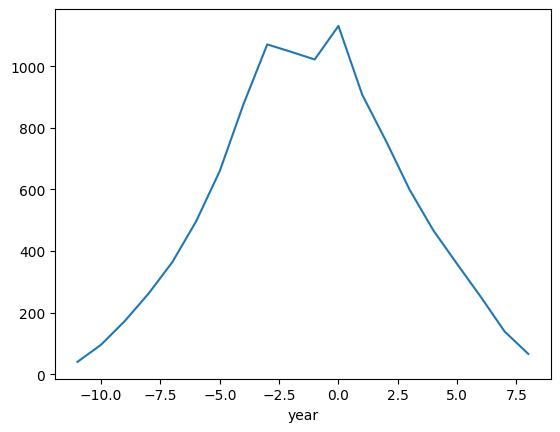

In [5]:
diffs.count(axis=1).plot()

## Main Results

- Below, I plot the RMSE pre-treatment against the corresponding pool size.
- As can be seen, the variation is NOT monotonic and has a minimal optimum at lower pool size values, with little variation up to pool sizes around 100.
- The current RMSE minimum for this variable is achieved with a pool size of 9 units.
- This analysis considers all pre-treatment data points.

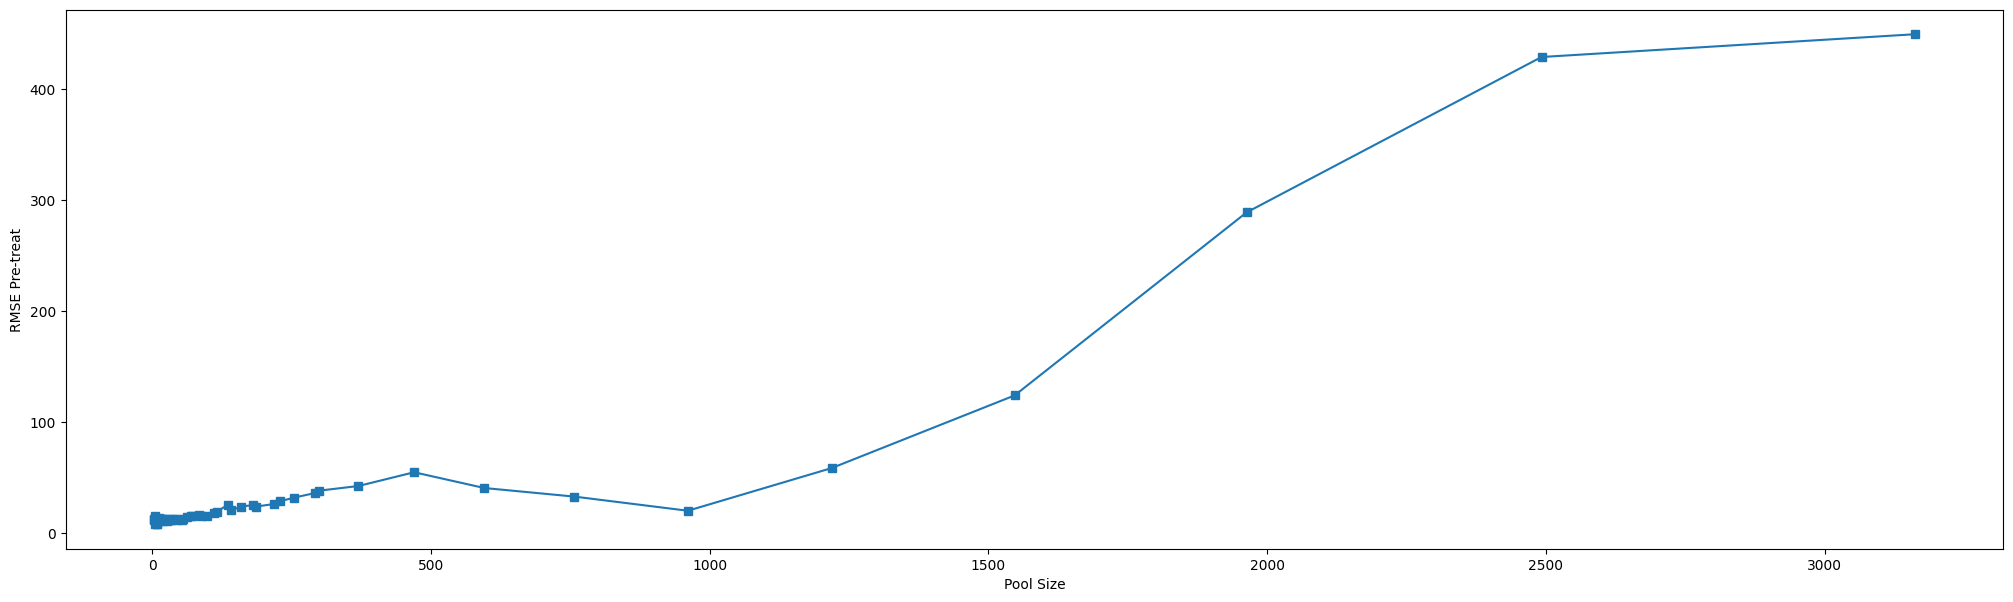

In [6]:
directory_path = "./size_tests//"
files = os.listdir(directory_path)
values = []
size = []
for file in files:
    if "diffs_ind" in file and "w_" not in file:
        diffs = pd.read_csv(f'{directory_path}{file}', index_col=0)
        values.append(np.sqrt((diffs.mean(axis=1).loc[:-1]**2).mean()))    
        base_name = file.split(".")[0]
        shards = base_name.split("_")
        size.append(shards[-1])

out = pd.DataFrame({"size": size, "RMSE": values})
out['size'] = out['size'].astype(int)
out = out.sort_values(by='size').reset_index(drop=True)
figure(figsize=(25, 7))
plt.plot(out['size'], out['RMSE'], marker='s')
plt.xlabel('Pool Size')
plt.ylabel('RMSE Pre-treat')
plt.show()

In [35]:
out

,size,RMSE


## Optimal Pool Size

In [7]:
min_index = out['RMSE'].idxmin()
out.loc[min_index, 'size']

9